In [1]:
from marcap import marcap_data
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


In [2]:
df_2023 = marcap_data('2022-10-01', '2023-02-28')
df_2023.reset_index(inplace=True)
df_2023['Date'] = df_2023['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
date_list = sorted(df_2023['Date'].unique())
# date_list = sorted(map(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'), df_2023['Date'].unique()))
date_to_ind = {date: i for i, date in enumerate(date_list)}
df_2023.head()

,Date,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
0,2022-10-04,005930,삼성전자,KOSPI,NaN,55200,1,2100,3.95,55300,55400,54500,19148435,1056852669700,329531996760000,5969782550,STK,1
1,2022-10-04,373220,LG에너지솔루션,KOSPI,NaN,444500,1,18000,4.22,429500,446000,415000,385281,167012070000,104013000000000,234000000,STK,2
2,2022-10-04,000660,SK하이닉스,KOSPI,NaN,86200,1,3100,3.73,85200,87200,85200,4277404,369025972586,62753803863000,728002365,STK,3
3,2022-10-04,207940,삼성바이오로직스,KOSPI,NaN,811000,1,4000,0.50,817000,819000,800000,43322,35148508000,57722114000000,71174000,STK,4
4,2022-10-04,005935,삼성전자우,KOSPI,NaN,49300,1,2400,5.12,48250,49300,48150,1442439,70552576300,40568314310000,822886700,STK,5


In [179]:
rise_stock_list = []  # 상한가 리스트
next_date_stock_list = [] # 상한가 다음날 리스트
for i in range(len(df_2023)):
    now_case = df_2023.loc[i]
    changes_ratio = now_case['ChagesRatio']
    if changes_ratio > 29:
        next_date_ind = date_to_ind[now_case['Date']] + 1
        if next_date_ind > len(date_list)-1:
            break
        next_date = date_list[next_date_ind]
        rise_stock_list.append(now_case)
        next_day_case = df_2023[(df_2023['Date'] == next_date) & (df_2023['Code'] == now_case['Code'])]
        next_date_stock_list.append(next_day_case)

rise_stock_res = pd.DataFrame(rise_stock_list)
next_date_stock_res = pd.concat(next_date_stock_list)

In [180]:
rise_stock_res.describe()['ChagesRatio']

count    421.000000
mean      30.938195
std       21.522524
min       29.020000
25%       29.820000
50%       29.900000
75%       29.960000
max      471.430000
Name: ChagesRatio, dtype: float64

In [181]:
next_date_stock_res.describe()['ChagesRatio']

count    411.000000
mean       3.594501
std       12.634588
min      -31.380000
25%       -4.675000
50%        1.360000
75%        7.640000
max       30.000000
Name: ChagesRatio, dtype: float64

In [195]:
def calc_ratio(start, end):
    return round((end - start) / start * 100, 2)

next_date_stock_res['HighChangeRatio'] = next_date_stock_res.apply(lambda x: calc_ratio(x['Open'], x['High']), axis=1)
next_date_stock_res['LowChangeRatio'] = next_date_stock_res.apply(lambda x: calc_ratio(x['Open'], x['Low']), axis=1)

In [196]:
next_date_stock_res.describe()['HighChangeRatio']

count    411.000000
mean       8.056545
std        7.270662
min        0.000000
25%        2.065000
50%        6.180000
75%       12.135000
max       31.730000
Name: HighChangeRatio, dtype: float64

In [197]:
high_change_ratio = next_date_stock_res['HighChangeRatio']
low_change_ratio = next_date_stock_res['LowChangeRatio']

In [198]:
high_change_ratio

3190      11.28
3384       7.75
3550       1.05
4357       4.65
5017       0.00
          ...  
259371    13.41
259636     5.04
260793    11.74
261314     0.79
262240    11.47
Name: HighChangeRatio, Length: 411, dtype: float64

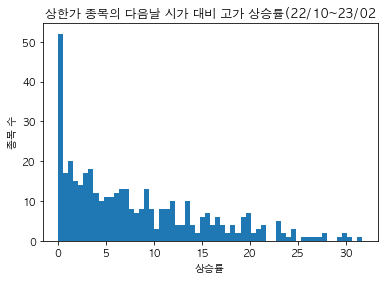

In [199]:
import matplotlib.pyplot as plt


# Create a histogram with 10 bins
plt.hist(high_change_ratio, bins=60)
# plt.scatter(high_change_ratio)

# Add a title and labels for the axes
plt.title('상한가 종목의 다음날 시가 대비 고가 상승률(22/10~23/02')
plt.xlabel('상승률')
plt.ylabel('종목 수')

# Display the plot
plt.show()

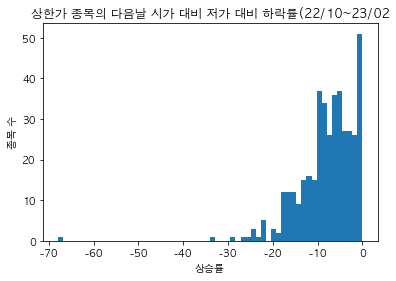

In [200]:
import matplotlib.pyplot as plt


# Create a histogram with 10 bins
plt.hist(low_change_ratio, bins=60)
# plt.scatter(high_change_ratio)

# Add a title and labels for the axes
plt.title('상한가 종목의 다음날 시가 대비 저가 대비 하락률(22/10~23/02')
plt.xlabel('상승률')
plt.ylabel('종목 수')

# Display the plot
plt.show()

In [208]:
next_date_stock_res[next_date_stock_res['LowChangeRatio'] < -30]

,Date,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,HighChangeRatio,LowChangeRatio
141345,2022-12-20,329020,오션스톤,KONEX,일반기업부,549,2,-251,-31.38,1000,1000,320,218464,124987563,458498448,835152,KNX,2683,0.00,-68.00
148568,2022-12-23,175140,인포마크,KOSDAQ,관리종목(소속부없음),5800,2,-1020,-14.96,8520,8860,5680,1079423,7709386820,52090728000,8981160,KSQ,2086,3.99,-33.33
